In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D
from keras.layers import MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adagrad

In [2]:
train_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/train/"
test_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/"
val_path="C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/val/"

In [3]:
x_train=[]
for folder in os.listdir(train_path):

    sub_path=train_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_train.append(img_arr)
        
x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):
    
    sub_path=val_path+"/"+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        img_arr=cv2.imread(image_path)

        img_arr=cv2.resize(img_arr,(224,224))

        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
test_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)
val_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 shuffle = True,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            shuffle = False,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 251 images belonging to 2 classes.
Found 250 images belonging to 2 classes.


In [6]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [7]:
training_set.class_indices

train_y.shape,test_y.shape,val_y.shape

((2000,), (251,), (250,))

In [8]:
IMAGE_SIZE = [224, 224]

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False

In [9]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
opt = Adagrad(learning_rate=0.001)
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer=opt,
  metrics=["accuracy"]
)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [12]:
model.save("C:/Users/atulp/OptimizersBrainStroke/AdagradSavedModel/modelAdagradAugmented.h5")

In [12]:
import tensorflow as tf
with tf.device("cpu:0"):
    history = model.fit(
        train_x,
        train_y,
        validation_data=(val_x,val_y),
        epochs=10,
        callbacks=[early_stop],
        batch_size=32,shuffle=True)

Epoch 1/10
63/63 [==============================] - 175s 3s/step - loss: 0.6772 - accuracy: 0.6040 - val_loss: 0.6300 - val_accuracy: 0.6760
Epoch 2/10
63/63 [==============================] - 166s 3s/step - loss: 0.5677 - accuracy: 0.7055 - val_loss: 0.6794 - val_accuracy: 0.5720
Epoch 3/10
63/63 [==============================] - 168s 3s/step - loss: 0.5278 - accuracy: 0.7385 - val_loss: 0.5305 - val_accuracy: 0.7600
Epoch 4/10
63/63 [==============================] - 167s 3s/step - loss: 0.4920 - accuracy: 0.7730 - val_loss: 0.5013 - val_accuracy: 0.7720
Epoch 5/10
63/63 [==============================] - 168s 3s/step - loss: 0.4762 - accuracy: 0.7870 - val_loss: 0.4866 - val_accuracy: 0.7520
Epoch 6/10
63/63 [==============================] - 169s 3s/step - loss: 0.4572 - accuracy: 0.8065 - val_loss: 0.4861 - val_accuracy: 0.7400
Epoch 7/10
63/63 [==============================] - 167s 3s/step - loss: 0.4436 - accuracy: 0.8155 - val_loss: 0.4653 - val_accuracy: 0.7840
Epoch 8/10
63

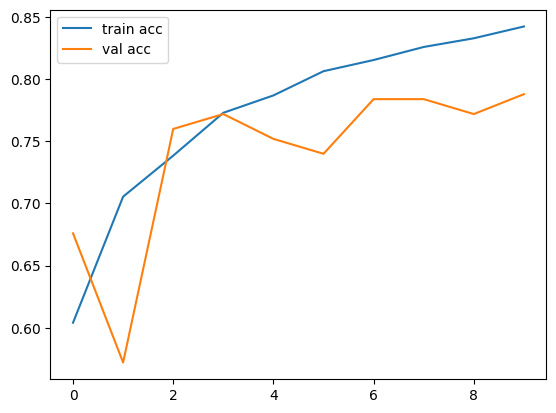

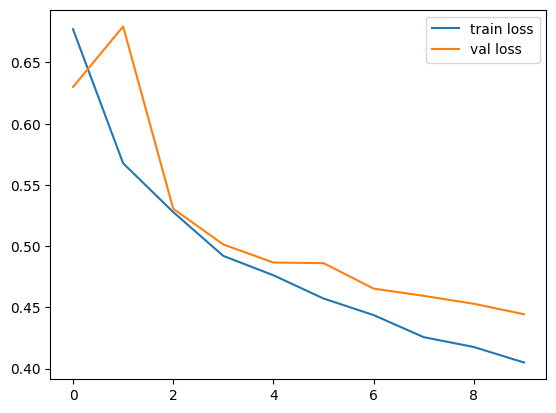

In [13]:
# accuracies

plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('C:/Users/atulp/Downloads/3rd Review Work/PLOTs/ADAGRAD PLOT/Training Process/Newer copy vgg-acc-rps-1.png')

plt.show()

# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('C:/Users/atulp/Downloads/3rd Review Work/PLOTs/ADAGRAD PLOT/Training Process/Newer copy vgg-loss-rps-1.png')
plt.show()

In [14]:
history.history

{'loss': [0.6771862506866455,
  0.567666232585907,
  0.5277895927429199,
  0.49197134375572205,
  0.4761520326137543,
  0.4571816325187683,
  0.44364020228385925,
  0.42560556530952454,
  0.41757068037986755,
  0.4049263596534729],
 'accuracy': [0.6039999723434448,
  0.7055000066757202,
  0.7384999990463257,
  0.7730000019073486,
  0.7870000004768372,
  0.8065000176429749,
  0.815500020980835,
  0.8259999752044678,
  0.8330000042915344,
  0.8424999713897705],
 'val_loss': [0.629989504814148,
  0.6794092059135437,
  0.5305172801017761,
  0.5013300180435181,
  0.48658281564712524,
  0.4860821068286896,
  0.4652843773365021,
  0.4593544900417328,
  0.4528878331184387,
  0.44434690475463867],
 'val_accuracy': [0.6759999990463257,
  0.5720000267028809,
  0.7599999904632568,
  0.7720000147819519,
  0.7519999742507935,
  0.7400000095367432,
  0.7839999794960022,
  0.7839999794960022,
  0.7720000147819519,
  0.7879999876022339]}

In [15]:
model.evaluate(test_x,test_y,batch_size=32)

8/8 [==============================] - 15s 575ms/step - loss: 0.4360 - accuracy: 0.7928


[0.43595343828201294, 0.7928286790847778]

In [17]:
#from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

#get classification report
#print(classification_report(y_pred,test_y))

#get confusion matrix

#print(confusion_matrix(y_pred,test_y))

In [18]:
accuracy_score(y_pred,test_y)

0.7928286852589641

(<Figure size 800x800 with 1 Axes>,
 <AxesSubplot: xlabel='predicted label', ylabel='true label'>)

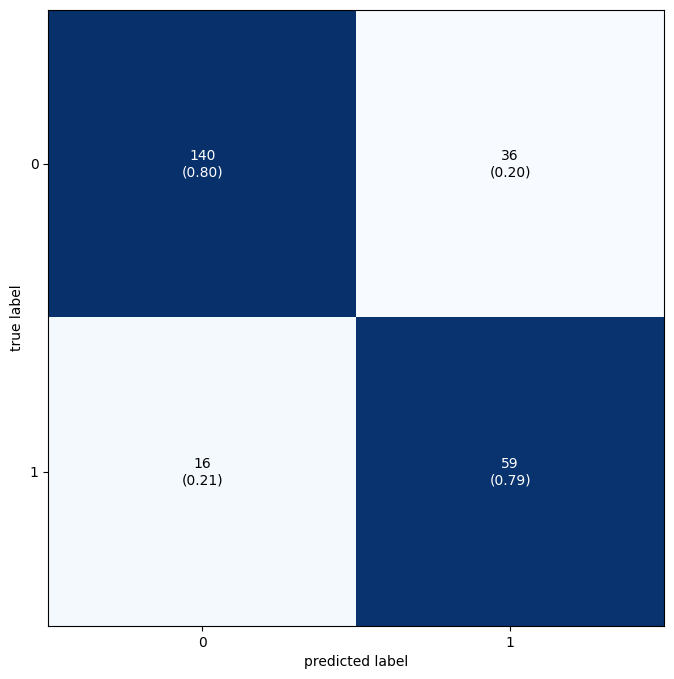

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred,test_y)
plot_confusion_matrix(conf_mat=mat, figsize=(8,8),show_normed=True)

In [21]:
precision_score(y_pred,test_y)

0.6210526315789474

In [22]:
recall_score(y_pred,test_y)

0.7866666666666666

In [23]:
f1_score(y_pred,test_y)

0.6941176470588235

Stroke


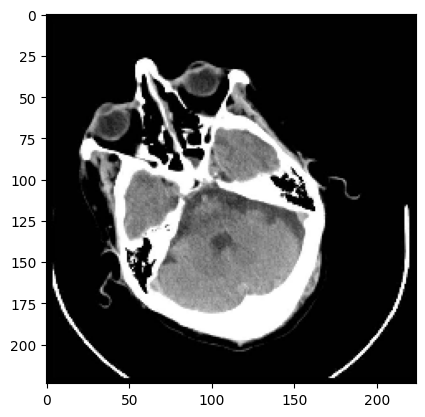

In [24]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
img = image.load_img("C:/Users/atulp/OptimizersBrainStroke/Brain Stroke DATA/test/Stroke/92 (12).jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("C:/Users/atulp/OptimizersBrainStroke/AdagradSavedModel/modelAdagradAugmented.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Stroke")
else:
    print('Normal')